# <center style='color:#730071'>EV Market Segmentation: Electric Vehicle Dataset</center>

## <span style='color:#A2D00B'>Importing Libraries</span>

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from IPython.display import Markdown, display
from sklearn.preprocessing import StandardScaler, MinMaxScaler

warnings.filterwarnings("ignore")

## <span style='color:#A2D00B'>Exploring Dataset</span>

Source: https://tn.data.gov.in/resource/stateuts-wise-current-sales-electric-vehicles-ev-country-various-segments-reply-unstarred

The dataset appears to contain information about various types of vehicles registered or present in different states or union territories of India. The columns in the dataset represent different categories of vehicles, and the rows correspond to different states or territories. Here's a brief overview of the columns:

* State Name: The name of the state or union territory.
* Two Wheeler: The number of two-wheeled vehicles, such as motorcycles and scooters.
* Three Wheeler: The number of three-wheeled vehicles, such as auto-rickshaws.
* Four Wheeler: The number of four-wheeled vehicles, typically including cars.
* Goods Vehicles: The number of vehicles used for transporting goods.
* Public Service Vehicle: The number of vehicles used for public transport, such as buses.
* Special Category Vehicles: The number of vehicles falling under a special category (exact definition not provided in the dataset).
* Ambulance/Hearses: The number of ambulances and hearses.
* Construction Equipment Vehicle: The number of vehicles used in construction, like excavators and bulldozers.
* Other: A category for other types of vehicles not specified in the previous columns.
* Grand Total: The total number of vehicles across all categories for each state or territory.

In [2]:
# loading & displaying data
df = pd.read_csv('Datasets/India_states_EV.csv')
df.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931


In [3]:
# Shape
print("Shape -",df.shape)

Shape - (32, 11)


In [4]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State Name                      32 non-null     object 
 1   Two Wheeler                     32 non-null     int64  
 2   Three Wheeler                   28 non-null     float64
 3   Four Wheeler                    32 non-null     int64  
 4   Goods Vehicles                  28 non-null     float64
 5   Public Service Vehicle          24 non-null     float64
 6   Special Category Vehicles       9 non-null      float64
 7   Ambulance/Hearses               5 non-null      float64
 8   Construction Equipment Vehicle  5 non-null      float64
 9   Other                           28 non-null     float64
 10  Grand Total                     32 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 2.9+ KB


In [5]:
# Description
df.describe()

,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
count,32.000000,28.000000,32.00000,28.000000,24.000000,9.000000,5.000000,5.000000,28.000000,32.000000
mean,8829.437500,23113.785714,822.96875,108.428571,84.958333,45.555556,1.200000,79.400000,157.571429,30198.843750
std,15027.420445,52178.963264,1661.50339,305.682167,182.408638,112.373386,0.447214,161.695083,400.087993,54220.859227
min,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000
25%,68.500000,136.000000,13.75000,3.000000,9.500000,2.000000,1.000000,1.000000,3.750000,1323.000000
50%,1984.500000,3674.000000,131.50000,17.000000,31.000000,2.000000,1.000000,1.000000,19.000000,11156.500000
75%,10306.500000,19470.250000,638.50000,37.000000,43.250000,25.000000,1.000000,26.000000,65.000000,45205.000000
max,56737.000000,257159.000000,7212.00000,1281.000000,851.000000,344.000000,2.000000,368.000000,1602.000000,276217.000000


## <span style='color:#A2D00B'>Data Cleaning</span>

In [6]:
# Null data
df.isnull().sum()

State Name                         0
Two Wheeler                        0
Three Wheeler                      4
Four Wheeler                       0
Goods Vehicles                     4
Public Service Vehicle             8
Special Category Vehicles         23
Ambulance/Hearses                 27
Construction Equipment Vehicle    27
Other                              4
Grand Total                        0
dtype: int64

In [7]:
# handling null data by replacing Nan with 0
df.fillna(0, inplace=True)

In [8]:
# Duplicate Data
df.duplicated().sum()

0

## <span style='color:#A2D00B'>Exploratory Data Analysis</span>

### <span style='color:#A2D00B'>State Vs Wheelers</span>

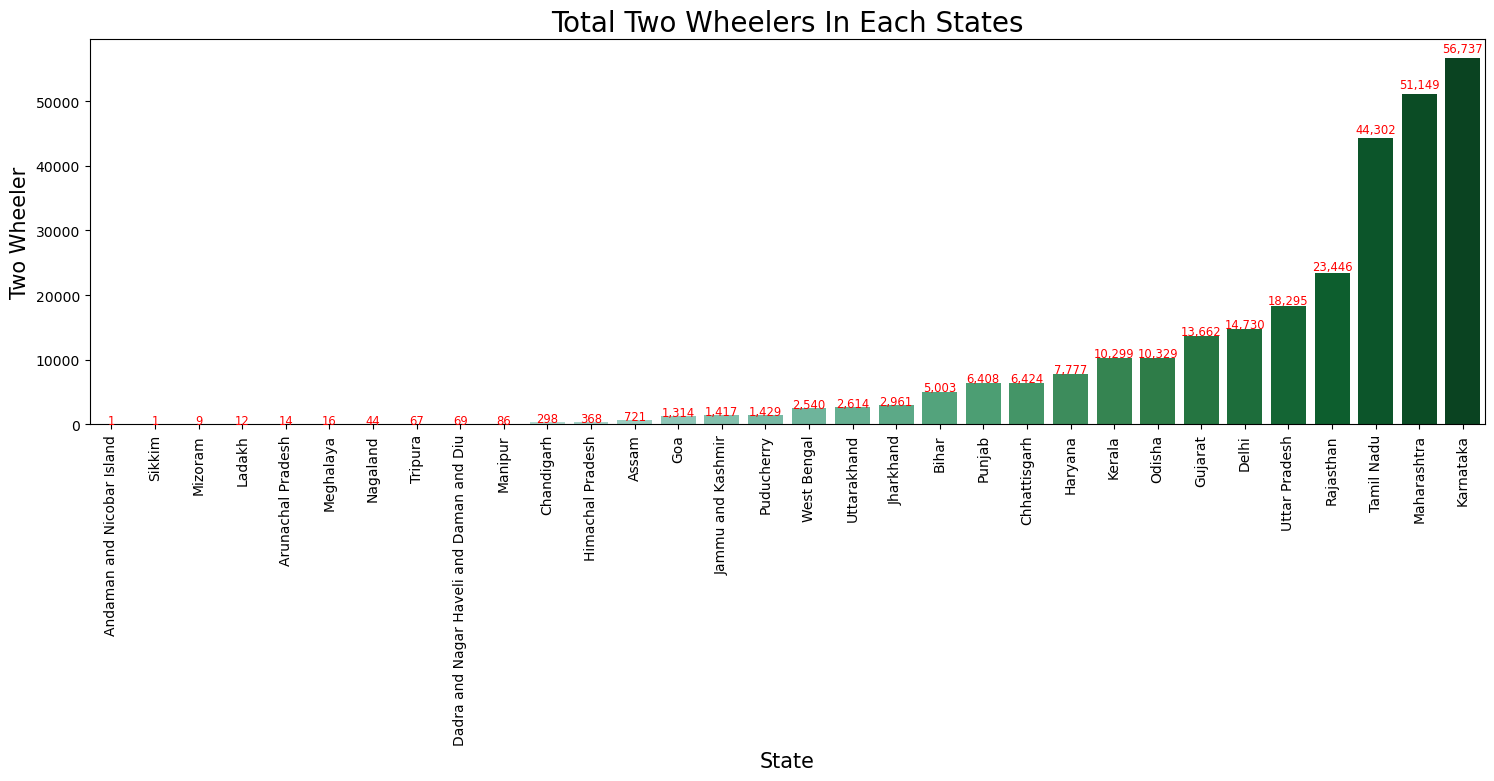

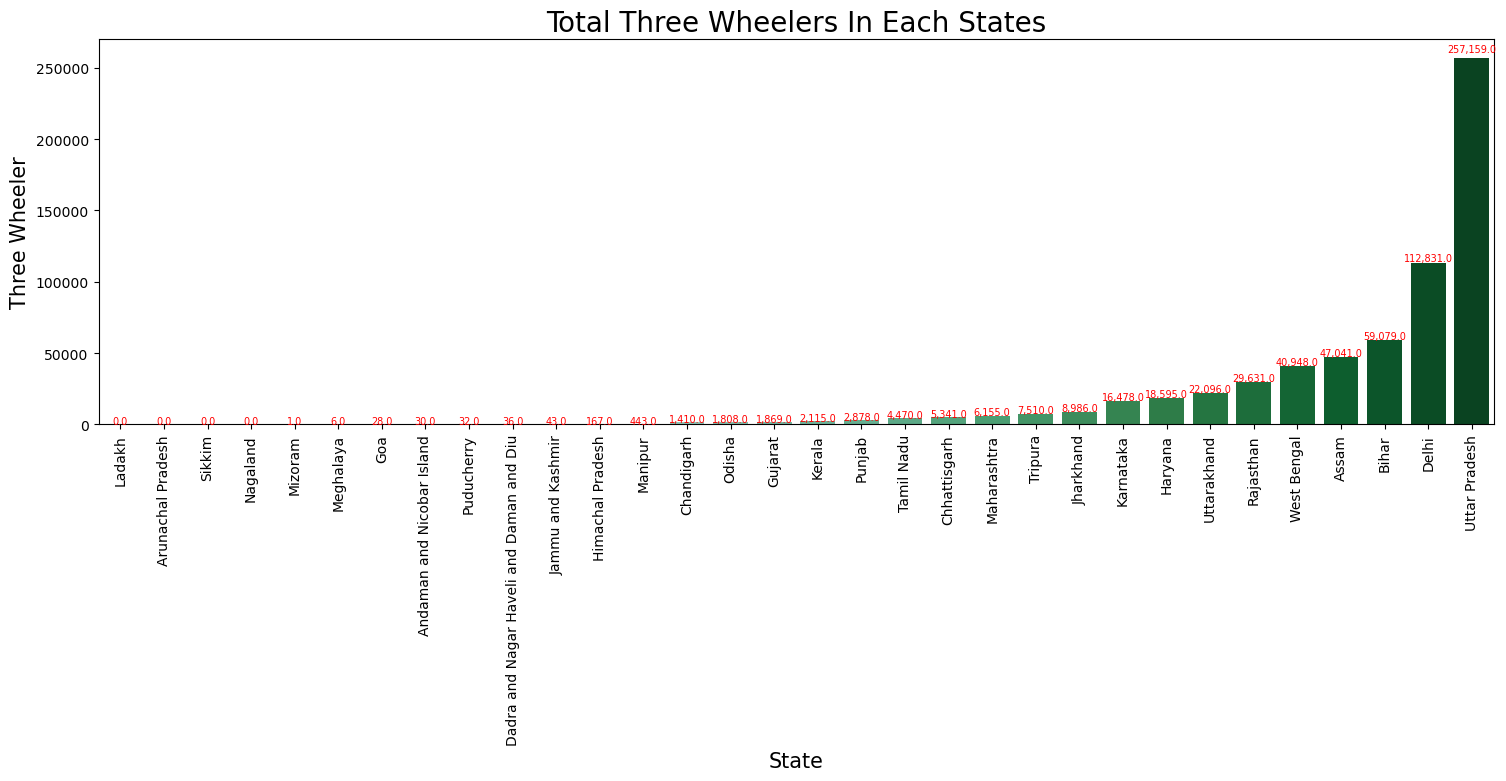

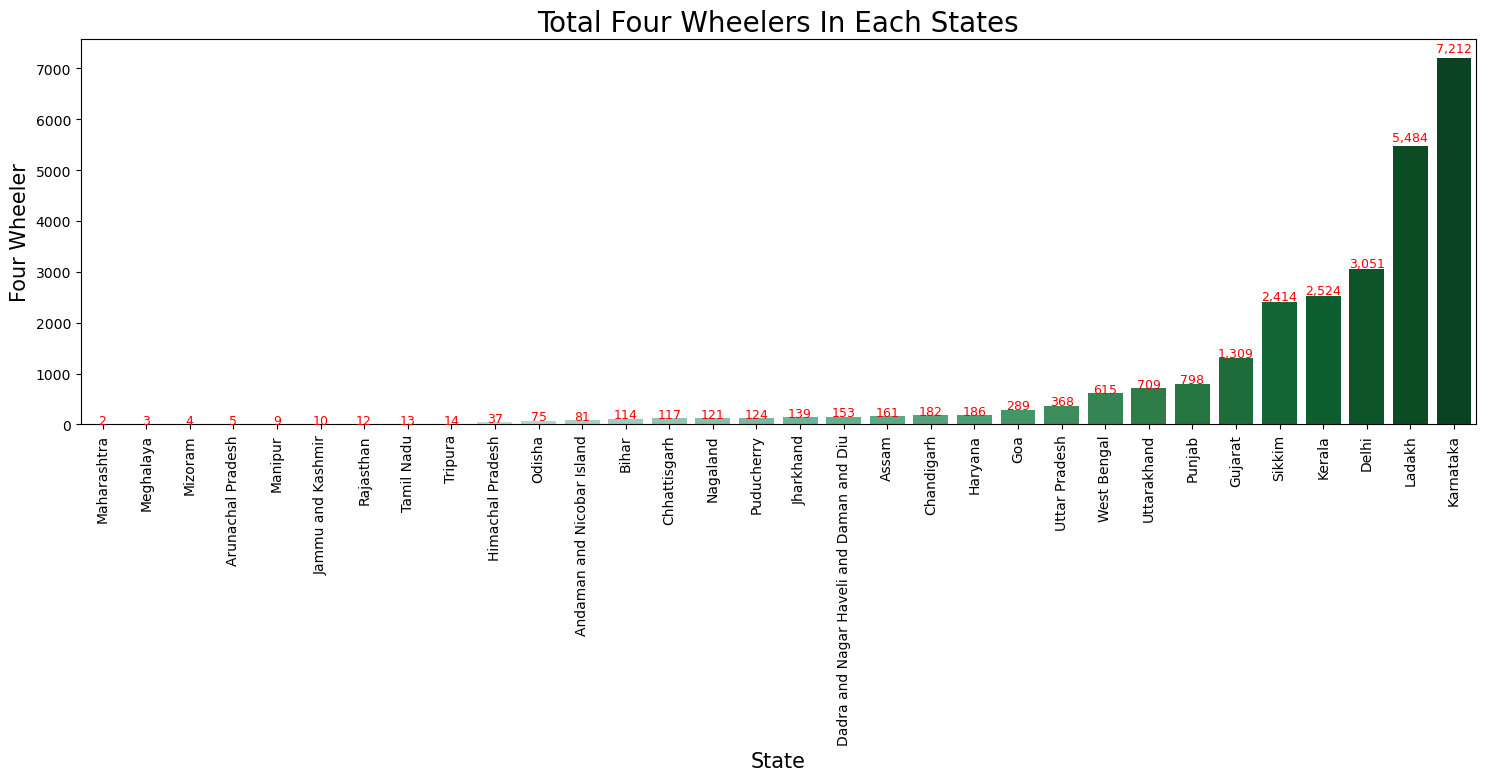

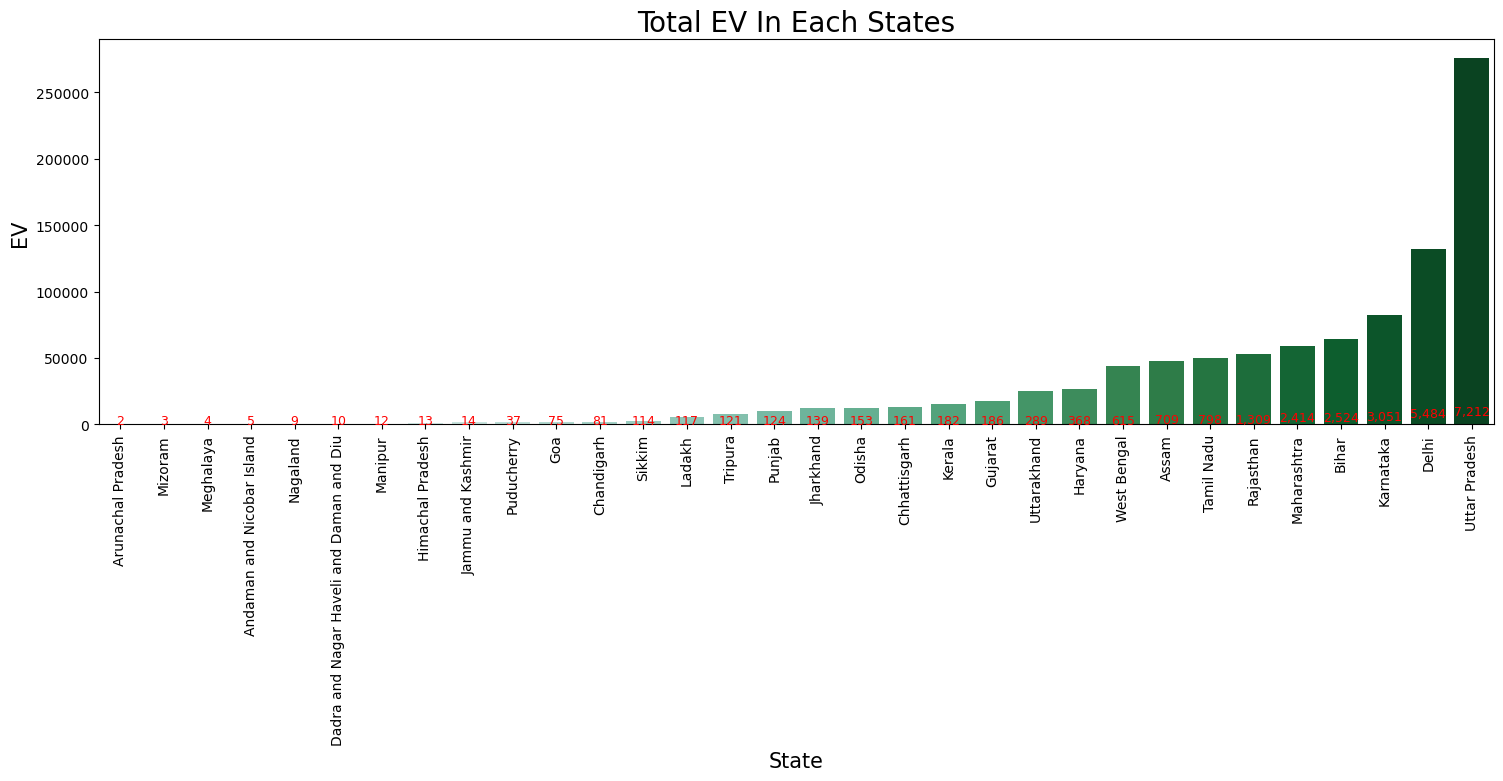

In [9]:
plt.figure(figsize=(18,5))
sns.barplot(data=df.sort_values(by='Two Wheeler',ascending=True), x='State Name', y='Two Wheeler', palette='BuGn')
plt.title("Total Two Wheelers In Each States", size=20)
plt.xlabel('State', size=15)
plt.ylabel('Two Wheeler', size=15)
plt.xticks(rotation=90)
for index, value in enumerate(df.sort_values(by='Two Wheeler', ascending=True)['Two Wheeler']):
    plt.text(index, value + 0.016 * value, f'{value:,}', ha='center', fontsize='small', color='red')
plt.show()


plt.figure(figsize=(18,5))
sns.barplot(data=df.sort_values(by='Three Wheeler',ascending=True), x='State Name', y='Three Wheeler', palette='BuGn')
plt.title("Total Three Wheelers In Each States", size=20)
plt.xlabel('State', size=15)
plt.ylabel('Three Wheeler', size=15)
plt.xticks(rotation=90)
for index, value in enumerate(df.sort_values(by='Three Wheeler', ascending=True)['Three Wheeler']):
    plt.text(index, value + 0.016 * value, f'{value:,}', ha='center', fontsize=7, color='red')
plt.show()



plt.figure(figsize=(18,5))
sns.barplot(data=df.sort_values(by='Four Wheeler',ascending=True), x='State Name', y='Four Wheeler', palette='BuGn')
plt.title("Total Four Wheelers In Each States", size=20)
plt.xlabel('State', size=15)
plt.ylabel('Four Wheeler', size=15)
plt.xticks(rotation=90)
for index, value in enumerate(df.sort_values(by='Four Wheeler', ascending=True)['Four Wheeler']):
    plt.text(index, value + 0.016 * value, f'{value:,}', ha='center', fontsize=9, color='red')
plt.show()


plt.figure(figsize=(18,5))
sns.barplot(data=df.sort_values(by='Grand Total',ascending=True), x='State Name', y='Grand Total', palette='BuGn')
plt.title("Total EV In Each States", size=20)
plt.xlabel('State', size=15)
plt.ylabel('EV', size=15)
plt.xticks(rotation=90)
for index, value in enumerate(df.sort_values(by='Four Wheeler', ascending=True)['Four Wheeler']):
    plt.text(index, value + 0.016 * value, f'{value:,}', ha='center', fontsize=9, color='red')
plt.show()

### <span style='color:#A2D00B'>State Vs Vehicle Types</span>

In [10]:
vehicle_types = ["Two Wheeler", "Three Wheeler", 'Four Wheeler','Goods Vehicles','Public Service Vehicle', 'Special Category Vehicles', 
                 'Ambulance/Hearses','Construction Equipment Vehicle', 'Other']

df_sorted = df.sort_values('Grand Total', ascending=False)
df_sorted.set_index('State Name')[vehicle_types]

,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other
State Name,,,,,,,,,
Uttar Pradesh,18295,257159.0,368,53.0,327.0,2.0,0.0,0.0,13.0
Delhi,14730,112831.0,3051,49.0,39.0,0.0,0.0,0.0,1602.0
Karnataka,56737,16478.0,7212,153.0,44.0,1.0,1.0,0.0,1420.0
Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0
Maharashtra,51149,6155.0,2,30.0,851.0,26.0,1.0,0.0,601.0
Rajasthan,23446,29631.0,12,25.0,1.0,0.0,1.0,1.0,24.0
Tamil Nadu,44302,4470.0,13,1281.0,37.0,0.0,0.0,0.0,193.0
Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0
West Bengal,2540,40948.0,615,28.0,97.0,0.0,2.0,0.0,61.0


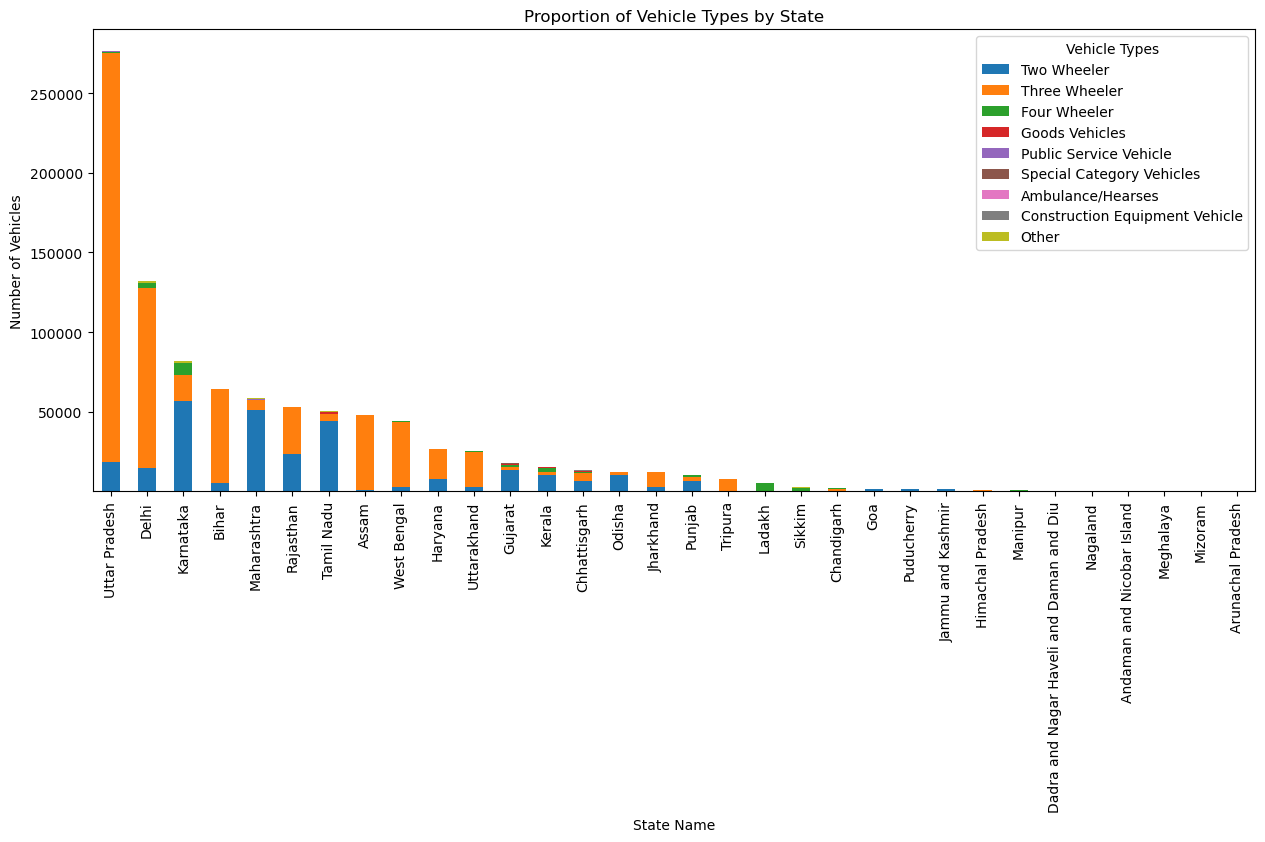

In [11]:
# Proportion of vehicle types by state
df_sorted.set_index('State Name')[vehicle_types].plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Proportion of Vehicle Types by State')
plt.xlabel('State Name')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.legend(title='Vehicle Types')
plt.show()

In [13]:
# EV Market Distribution Based On Vehicle Type
temp_df = pd.DataFrame({
    'EV Category': ['Two Wheeler', 'Three Wheeler', 'Four Wheeler'],
    "Total EVs": [df['Two Wheeler'].sum(),df['Three Wheeler'].sum(),df['Four Wheeler'].sum()]
})

temp_df


,EV Category,Total EVs
0,Two Wheeler,282542.0
1,Three Wheeler,647186.0
2,Four Wheeler,26335.0


## <span style='color:#A2D00B'>Observations</span>

#### <span style='color:teal'>1. **Total Electric Vehicle Adoption**</span>

| **Adoption**                 | **States**                                            | **Criteria**                     |
|-----------------------------|-------------------------------------------------------|----------------------------------|
| **High**    | Uttar Pradesh, Delhi, Karnataka                      | Top 3 states with highest total EVs |
| **Moderate**| Maharashtra, Rajasthan, Tamil Nadu                   | Moderate number of total EVs      |
| **Low**     | Arunachal Pradesh, Mizoram, Meghalaya                | Lowest number of total EVs        |

#### <span style='color:teal'>2. **Vehicle Type Dominance**

| **Dominance**                 | **States**                                            | **Dominant Vehicle Type**          |
|-----------------------------|-------------------------------------------------------|------------------------------------|
| **Two-Wheeler**    | Karnataka, Tamil Nadu, Delhi                         | Highest numbers in Two Wheelers    |
| **Four-Wheeler**   | Ladakh, Sikkim, Delhi                                | Highest numbers in Four Wheelers   |
| **Three-Wheeler**  | Uttar Pradesh, Assam, Bihar                          | Highest numbers in Three Wheelers  |

#### <span style='color:teal'>3. **Infrastructure Needs**

| **Infrastructure Need**                 | **States**                                            | **Criteria**             |
|-----------------------------|-------------------------------------------------------|--------------------------------------|
| **High** | Uttar Pradesh, Delhi, Karnataka                     | High numbers across various vehicle types |
| **Low**  | Arunachal Pradesh, Mizoram, Meghalaya               | Low numbers across all categories    |


#### <span style='color:teal'>4. **Growth Potential**

| **Growth Potential**                 | **States**                                            | **Criteria**                   |
|-----------------------------|-------------------------------------------------------|-----------------------------------------|
| **High**   | Assam, Jharkhand                                     | Low adoption but showing significant growth |
| **Low**    | Arunachal Pradesh, Mizoram                           | Very low numbers or high saturation     |